<a href="https://colab.research.google.com/github/roshank1605A04/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [62]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(32399, 3)
(17197, 2)


In [63]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [64]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [65]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [66]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [67]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: xlabel='label'>

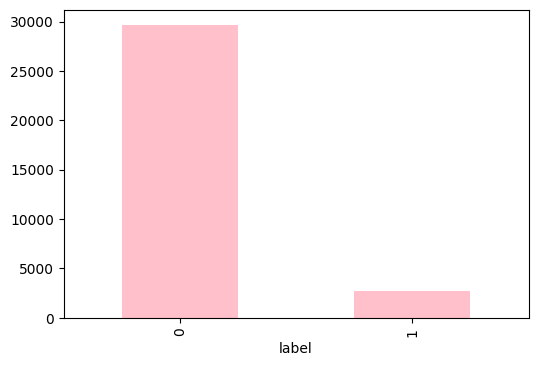

In [68]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

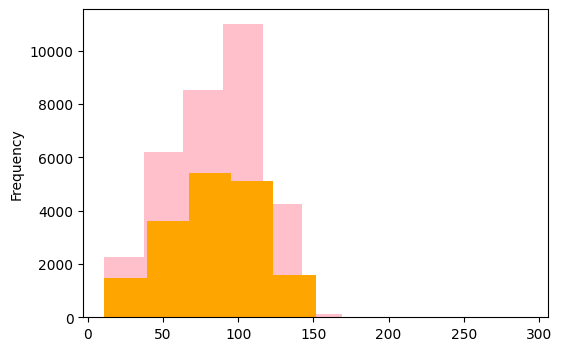

In [69]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [70]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [71]:

train.groupby('label').describe()

id                                                                \
         count          mean           std   min      25%      50%       75%   
label                                                                          
0      29720.0  15974.454441   9223.783469   1.0  7981.75  15971.5  23965.25   
1       2679.0  18702.296006  10359.098677  14.0  9645.00  19397.0  28650.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      32400.0   2679.0  86.131766  27.382109  12.0  63.0  90.0  109.0  152.0

In [72]:
#train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
#plt.title('variation of length')
#plt.xlabel('Length')
#plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

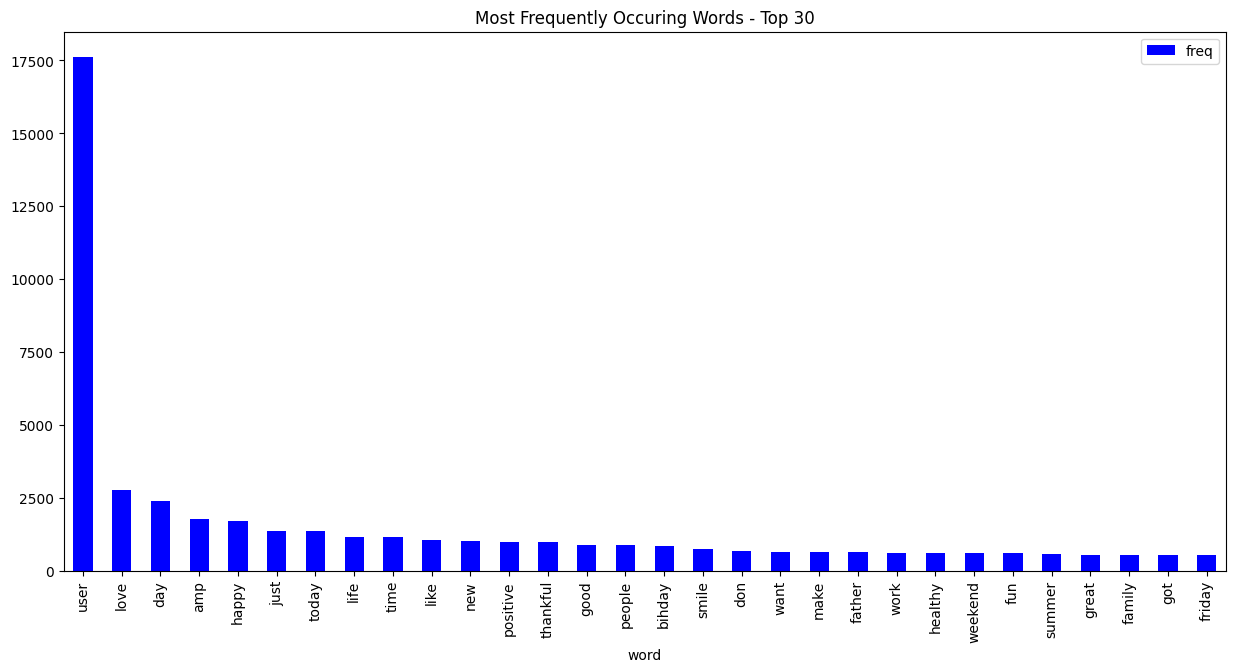

In [73]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

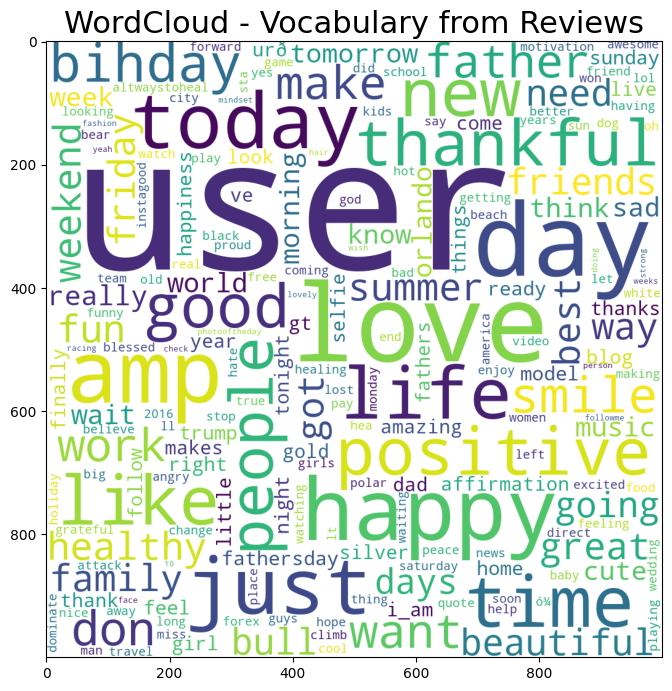

In [74]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

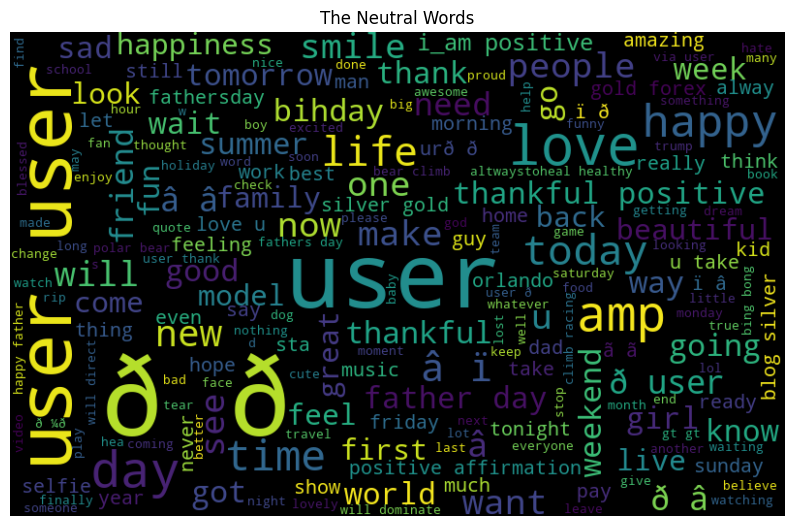

In [75]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


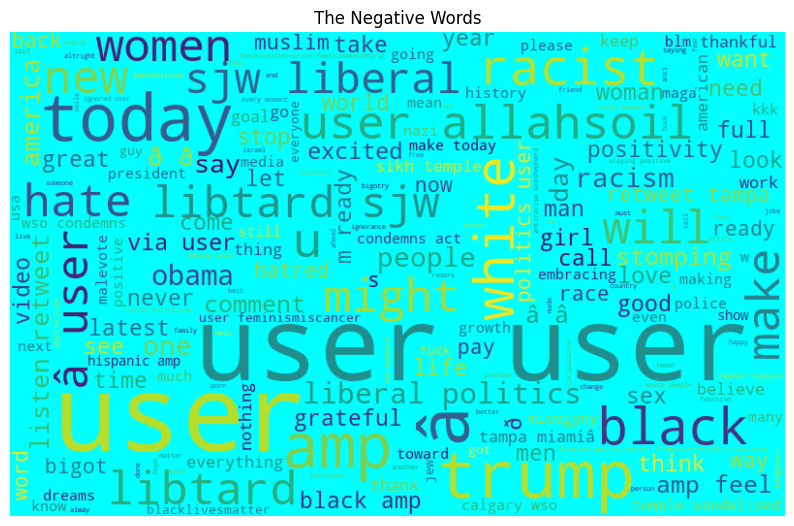

In [76]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [77]:
# collecting the hashtags
import re 
import nltk

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [78]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

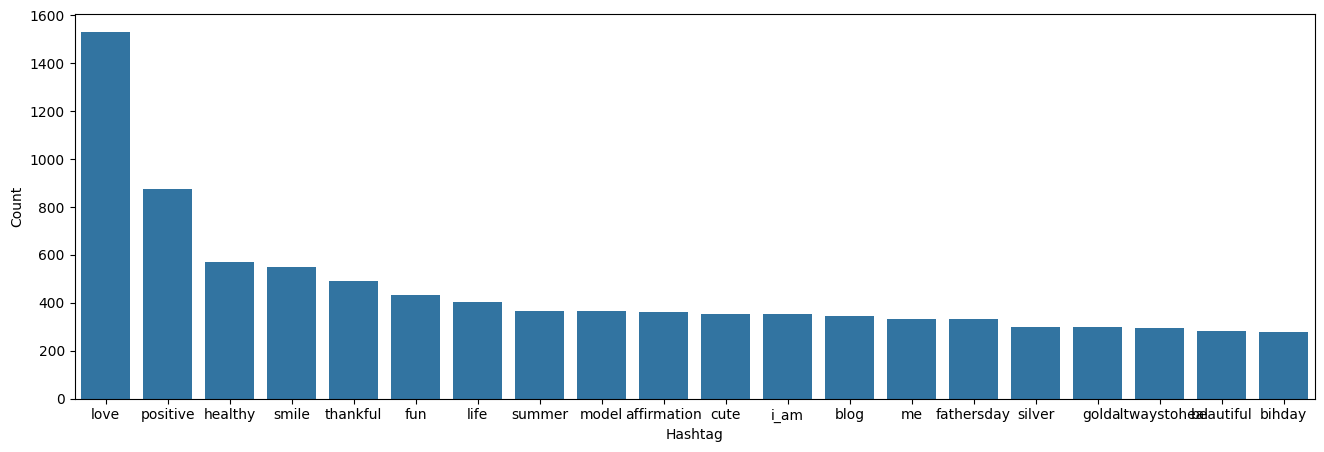

In [79]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

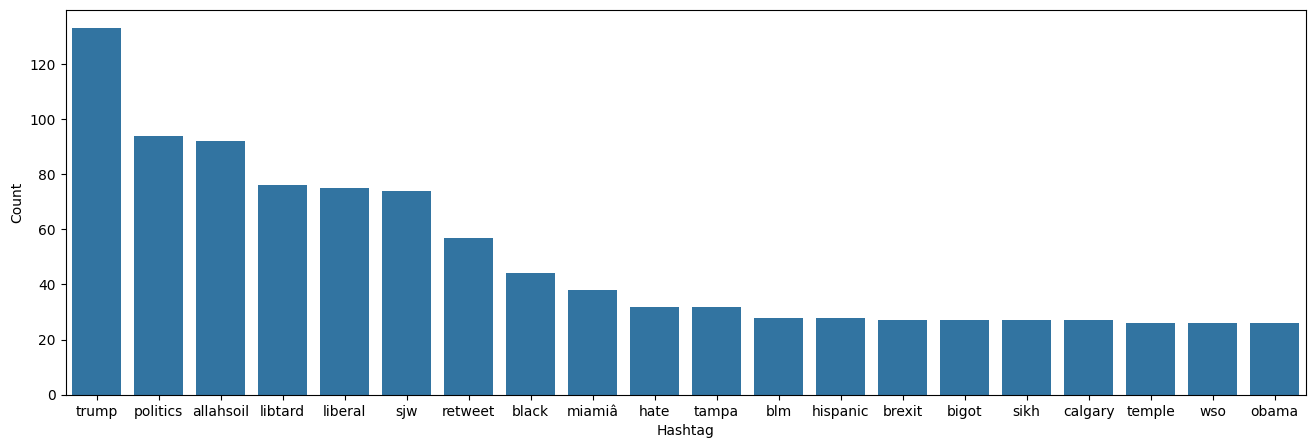

In [80]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [81]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6187207, 8508600)

In [82]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6399310827255249),
 ('#prosecco', 0.600562572479248),
 ('sister!!', 0.594504714012146),
 ('podium', 0.5929135084152222),
 ('enroute', 0.5926844477653503),
 ('#wanderlust', 0.5870148539543152),
 ('ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»â\x9d¤ï¸\x8fâ\x9d¤ï¸\x8f',
  0.586877167224884),
 ('#burgers', 0.5848587155342102),
 ('bay.', 0.5831621885299683),
 ('evening!', 0.579454243183136)]

In [83]:
model_w2v.wv.most_similar(positive = "cancer")

[('ownership', 0.7035700082778931),
 ('target.', 0.7007870674133301),
 ('champion,', 0.6992458701133728),
 ('law.', 0.6944488286972046),
 ('level.', 0.6916903853416443),
 ('solution', 0.6846472024917603),
 ('acknowledge', 0.683216392993927),
 ('inflict', 0.6826968789100647),
 ('enteaining', 0.6817843914031982),
 ('spewing', 0.6796826124191284)]

In [84]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7255838513374329),
 ('mytraining', 0.706492006778717),
 ('training"', 0.6965239644050598),
 ('app,', 0.6360441446304321),
 ('"my', 0.6167503595352173),
 ('ta', 0.5852546095848083),
 ('mp3', 0.5781856775283813),
 ('humans.', 0.5756121873855591),
 ('app', 0.5735853910446167),
 ('#ilovegin', 0.5714080333709717)]

In [85]:
model_w2v.wv.most_similar(negative = "hate")

[('#foodie', 0.047565337270498276),
 ('ð\x9f\x8d»', 0.046935927122831345),
 ('#tgif', 0.04239925369620323),
 ('#ireland', 0.040398500859737396),
 ('#staup', 0.03508098050951958),
 ('â\x9c\x88ï¸\x8f', 0.02179896831512451),
 ('â\x9c\x88', 0.018184475600719452),
 ('#community', 0.014519334770739079),
 ('its', 0.011455013416707516),
 ('#handmade', 0.0050873965956270695)]

In [86]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [87]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(words=s, tags=["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

In [88]:
# removing unwanted patterns from the data

import re
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stopwords = list(ENGLISH_STOP_WORDS)
from nltk.stem.porter import PorterStemmer


In [89]:
# Initialize the stemmer
ps = PorterStemmer()

# Create an empty list to store processed tweets
train_corpus = []

# Iterate over the tweets in the training set
for i in range(len(train['tweet'])):
    # Remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    
    # Convert to lowercase and split into words
    review = review.lower().split()
    
    # Remove stop words and apply stemming
    review = [ps.stem(word) for word in review if word not in ENGLISH_STOP_WORDS]
    
    # Join the words back into a single string and append to the corpus
    train_corpus.append(' '.join(review))

In [90]:
test_corpus = []

# Iterate over the tweets in the test set
for i in range(len(test['tweet'])):
    # Remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
    
    # Convert to lowercase and split into words
    review = review.lower().split()
    
    # Remove stop words and apply stemming
    review = [ps.stem(word) for word in review if word not in ENGLISH_STOP_WORDS]
    
    # Join the words back into a single string and append to the corpus
    test_corpus.append(' '.join(review))

In [91]:
from joblib import dump, load

In [92]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

dump(cv, 'cv.joblib')
load('cv.joblib')

print(x.shape)
print(y.shape)


(32399, 2500)
(32399,)


In [93]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [94]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(24299, 2500)
(8100, 2500)
(24299,)
(8100,)


In [95]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9532902588583893
Validation Accuracy : 0.904074074074074
f1 score : 0.5542168674698795
[[6840  568]
 [ 209  483]]


In [97]:
dump(model, 'model.joblib')
#dump(cv, 'vectorizer.joblib')

loaded_model = load('model.joblib')

In [98]:
print(train['label'].value_counts())

label
0    29720
1     2679
Name: count, dtype: int64
